In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.recurrent import SimpleRNN, LSTM, GRU

In [2]:
import os
os.chdir("C:\\Users\\Asus\\Desktop\\Images")

In [3]:
data = pd.read_csv("C:\\Users\\Asus\\Desktop\\Images\\data.csv")
data.head(n=10)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [25]:
Char_Dict={1:"1 क", 2:"2 ख", 3:"3 ग", 4:"4घ", 5:"5ङ",
6:"6च", 7:"7छ", 8:"8ज", 9:"9झ", 10:"10ञ",
11:"11ट", 12:"12ठ", 13:"13ड", 14:"14ढ", 15:"15ण",
16:"16त", 17:"17थ", 18:"18द", 19:"19ध", 20:"20न",
21:"21प", 22:"22फ", 23:"23ब", 24:"24भ", 25:"25म",
26:"26य", 27:"27र", 28:"28ल", 29:"29व", 30:"30श", 31:"31ष",
32:"32स", 33:"33ह",34:"34ष", 35:"35र", 36:"36ञ",
37 : "0",38 : "1",39 : "2",
40 : "3",41 : "4",42 : "5",43 : "6",44 : "7",45 : "8",46 : "9"}
print(Char_Dict[5])

5ङ


In [6]:
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [35]:
X[0:1,:100]

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.19215686274509805, 0.22745098039215686,
        0.3176470588235294, 0.4588235294117647, 0.596078431372549,
        0.6549019607843137, 0.6549019607843137, 0.6235294117647059,
        0.5725490196078431, 0.5137254901960784, 0.5137254901960784,
        0.5764705882352941, 0.6980392156862745, 0.9333333333333333, 1.0,
        1.0, 0.9647058823529412, 0.8117647058823529, 0.7686274509803922,
        0.8431372549019608, 0.9686274509803922, 1.0, 0.9647058823529412,
        0.8823529411764706, 0.792156862745098, 0.7058823529411765,
        0.6235294117647059, 0.5607843137254902, 0.0, 0.0, 0.0, 0.0,
        0.4588235294117

In [7]:
n_classes = 46
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [8]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [9]:
img_height_rows = 32
img_width_cols = 32

im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [10]:

CNNmodel = Sequential()

CNNmodel.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=im_shape))
CNNmodel.add(Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
CNNmodel.add(Dropout(0.25))
CNNmodel.add(Flatten())
CNNmodel.add(Dense(128, activation='relu'))
CNNmodel.add(Dropout(0.5))
CNNmodel.add(Dense(64, activation='relu'))
CNNmodel.add(Dense(units=n_classes, activation='softmax', kernel_initializer='uniform'))
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(CNNmodel.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [37]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

CNNhistory = CNNmodel.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
2013/2013 [==============================] - 131s 65ms/step - loss: 0.3121 - accuracy: 0.9024 - val_loss: 0.3524 - val_accuracy: 0.9037
Epoch 2/10
2013/2013 [==============================] - 121s 60ms/step - loss: 0.2983 - accuracy: 0.9060 - val_loss: 0.3571 - val_accuracy: 0.9035
Epoch 3/10
2013/2013 [==============================] - 121s 60ms/step - loss: 0.2891 - accuracy: 0.9098 - val_loss: 0.3516 - val_accuracy: 0.9047
Epoch 4/10
2013/2013 [==============================] - 121s 60ms/step - loss: 0.2791 - accuracy: 0.9111 - val_loss: 0.3442 - val_accuracy: 0.9054
Epoch 5/10
2013/2013 [==============================] - 121s 60ms/step - loss: 0.2749 - accuracy: 0.9130 - val_loss: 0.3518 - val_accuracy: 0.9080
Epoch 6/10
2013/2013 [==============================] - 122s 61ms/step - loss: 0.2611 - accuracy: 0.9178 - val_loss: 0.3632 - val_accuracy: 0.9060
Epoch 7/10
2013/2013 [==============================] - 121s 60ms/step - loss: 0.2541 - accuracy: 0.9195 - val_loss: 0

In [38]:
scores = CNNmodel.evaluate(x_test, y_test, verbose=0)
print("CNN  ModelAccuracy: %.2f%%" % (scores[1]*100))

CNN  ModelAccuracy: 90.62%


In [39]:
pred = CNNmodel.predict(x_test[:12])
print(x_test.shape)

(27600, 32, 32, 1)


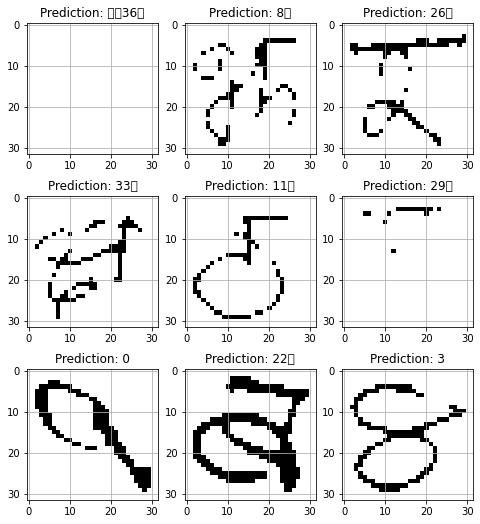

In [40]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (32,32))
    ax.imshow(img, cmap="Greys")
    pred = Char_Dict[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()